In [99]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [30]:
# data = image.imread('../dataset/step4_split_spectrograms/dataset_images_test/bark/approval/appl000000000000.png')

In [92]:
# images are normalized from 0-1. 

# images_bark = tf.keras.preprocessing.image_dataset_from_directory('../dataset/step4_split_spectrograms/dataset_images_training/bark')
# images_dis = tf.keras.preprocessing.image_dataset_from_directory('../dataset/step4_split_spectrograms/dataset_images_training/disapproval_all')
# images_neutral+ tf.keras.preprocessing.image_dataset_from_directory('../dataset/step4_split_spectrograms/dataset_images_training/neutral_all')
images_bark = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_training/bark'
validation_bark = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_test/bark'


In [93]:
train_bark = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=images_bark, target_size=(224,224), batch_size=16)
#converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset (normalizing between -1 to 1), without scaling. 

Found 7611 images belonging to 3 classes.


In [94]:
validation_bark = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=validation_bark, target_size=(224,224), batch_size=16)

Found 1904 images belonging to 3 classes.


In [95]:
imgs, labels = next(train_bark)

In [69]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

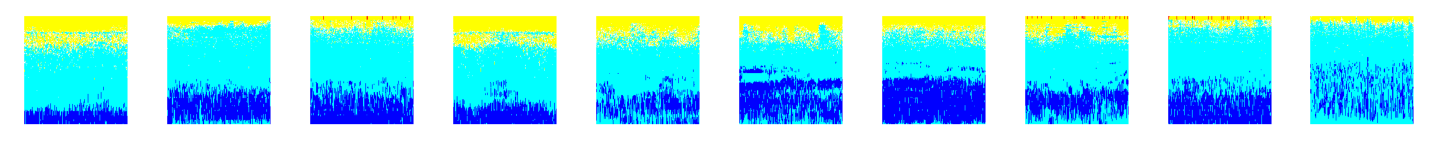

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [70]:
plotImages(imgs)
print(labels)

In [96]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
________________________________________________

In [101]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [85]:
model.fit(x=train_bark,
    steps_per_epoch=len(train_bark),
    validation_data=validation_bark,
    validation_steps=len(validation_bark),
    epochs=10,
    verbose=1, callbacks=callback)
#batch 32/learning rate .01/categorical_crossentroy, accuracy
# 238/238 [==============================] - 242s 1s/step - loss: 0.6378 - accuracy: 0.7752 - val_loss: 0.6460 - val_accuracy: 0.7710

Epoch 1/10
238/238 [==============================] - 227s 953ms/step - loss: 38.5167 - accuracy: 0.7562 - val_loss: 0.6526 - val_accuracy: 0.7710
Epoch 2/10
238/238 [==============================] - 212s 890ms/step - loss: 0.6556 - accuracy: 0.7696 - val_loss: 0.6458 - val_accuracy: 0.7710
Epoch 3/10
238/238 [==============================] - 220s 923ms/step - loss: 0.6462 - accuracy: 0.7745 - val_loss: 0.6457 - val_accuracy: 0.7710
Epoch 4/10
238/238 [==============================] - 230s 966ms/step - loss: 0.6404 - accuracy: 0.7763 - val_loss: 0.6458 - val_accuracy: 0.7710
Epoch 5/10
238/238 [==============================] - 225s 942ms/step - loss: 0.6336 - accuracy: 0.7761 - val_loss: 0.6457 - val_accuracy: 0.7710
Epoch 6/10
238/238 [==============================] - 224s 943ms/step - loss: 0.6553 - accuracy: 0.7667 - val_loss: 0.6456 - val_accuracy: 0.7710
Epoch 7/10
238/238 [==============================] - 209s 876ms/step - loss: 0.6475 - accuracy: 0.7721 - val_loss: 0.6457 

In [103]:
model.fit(x=train_bark,
    steps_per_epoch=len(train_bark),
    validation_data=validation_bark,
    validation_steps=len(validation_bark),
    epochs=10,
    verbose=1, callbacks=[callback])

Epoch 1/10
476/476 [==============================] - ETA: 0s - loss: 0.1789 - accuracy: 0.9468